# MNIST Digit classification using Neural Network

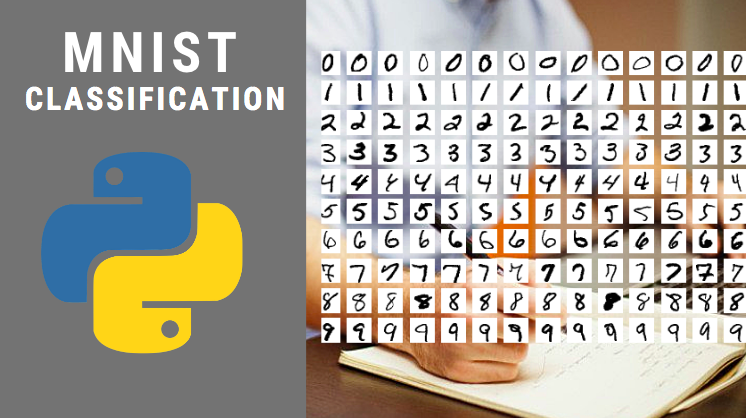

In [1]:
# Importing the Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# Loading the MNIST data from keras.datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
#data typr
type(X_train)

numpy.ndarray

In [4]:
# shape of numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Training Data=60,000 images 
### Test Data=10,000 images

### image_Dimensiom--->28 x 28
### Grayscale image--->1 channel

In [5]:
# Printing the 10th image 
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
# checking the shape of 10th image 
print(X_train[10].shape)

(28, 28)


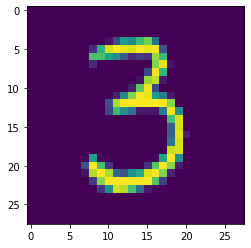

3


In [7]:
# Displaying the image 
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

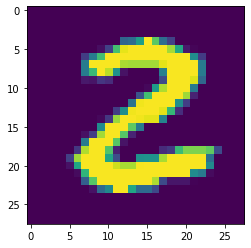

2


In [8]:
# Displaying the image 
plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [9]:
#  Image Label
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [10]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 We can use  these labels as such or we can aslo apply One Hot Encoding

All the images have the same diamension in this dataset,if not , we have to resize all the images to a common diamension

In [11]:
# scaling the values 
X_train=X_train/255
X_test=X_test/255

In [12]:
# printing the 10th images
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
# Building the Neural Network
# setting up the layers of the Neural Network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid'),
])

In [14]:
# Compile the Neural Network
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# training the Neural Network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3107 - accuracy: 0.9109
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1470 - accuracy: 0.9558
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1061 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0854 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0704 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0609 - accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0527 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0465 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0413 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.036

Training data accuracy = 98.9%

### Accuracy on Test data:

In [16]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1084 - accuracy: 0.9724
0.9724000096321106


Test data accuracy = 97.1%

In [17]:
print(X_test.shape)

(10000, 28, 28)


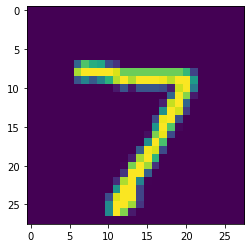

In [18]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[9.0201601e-04 3.0503077e-02 1.9592127e-01 9.5022446e-01 4.6600021e-02
 2.1735665e-03 3.4140157e-09 9.9999934e-01 7.6285951e-02 5.4334313e-01]


model.predict() gives the prediction probability of each class for that data point

In [23]:
# Converting the  prediction  probabilities to class label
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
print(Y_pred)

[[9.0201601e-04 3.0503077e-02 1.9592127e-01 ... 9.9999934e-01
  7.6285951e-02 5.4334313e-01]
 [1.7633868e-03 9.9926257e-01 1.0000000e+00 ... 5.1648001e-08
  9.8088068e-01 1.9682244e-11]
 [1.2324465e-04 9.9868411e-01 2.7174834e-02 ... 6.0698543e-02
  1.8368337e-02 9.4745116e-04]
 ...
 [3.8390536e-12 8.8354119e-04 5.2877009e-09 ... 3.2333931e-01
  2.7424656e-05 7.8915887e-02]
 [7.7232806e-04 1.5375281e-05 5.0620829e-06 ... 1.9121178e-03
  9.4400299e-01 5.9674770e-05]
 [5.9236404e-03 1.6391752e-05 1.0811841e-04 ... 5.4211770e-12
  1.7982461e-01 3.2636872e-11]]


### Y_test --> True labels

### Y_pred_labels --> Predicted Labels

#### Confusion Matrix

In [26]:
confu_mat=confusion_matrix(Y_test,Y_pred_labels)

In [27]:
print(confu_mat)

tf.Tensor(
[[ 953    0    4    0    1    6    7    1    4    4]
 [   0 1129    1    1    0    1    2    0    1    0]
 [   1    1  998    3    4    0    4    4   17    0]
 [   0    0    4  975    0   12    0    4    7    8]
 [   0    1    5    0  966    1    1    1    1    6]
 [   0    0    0    6    2  872    5    0    5    2]
 [   1    3    1    1    5    8  936    0    3    0]
 [   0   11    7    2    3    0    0  992    3   10]
 [   3    2    3    4    3    5    2    2  944    6]
 [   0    5    1    4   26    5    1    4    4  959]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

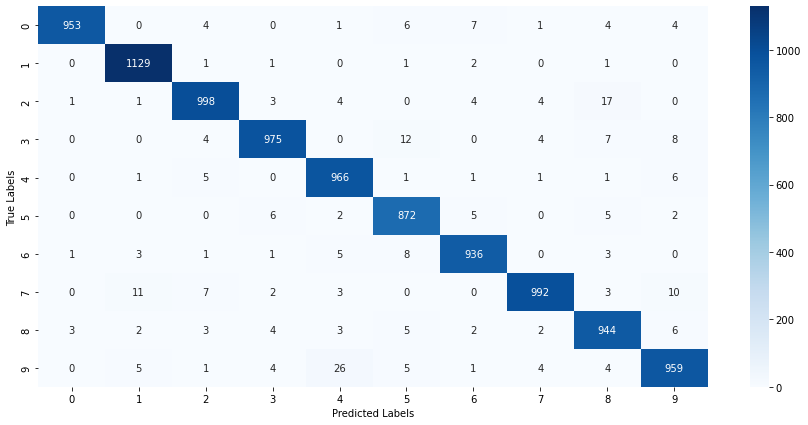

In [28]:
# Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(confu_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [56]:
# Building the predctive system
input_image_path ='C:/Users/Pranav/Downloads/MNIST_digit (1).png'
input_image = cv2.imread(input_image_path)

In [30]:
type(input_image)

numpy.ndarray

In [31]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


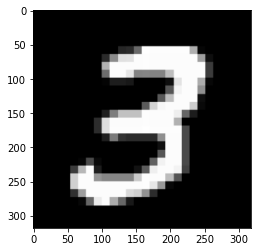

In [39]:
plt.imshow(input_image)
plt.show()

In [40]:
input_image.shape

(318, 318, 3)

In [41]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [42]:
grayscale.shape

(318, 318)

In [48]:
input_image_resize=cv2.resize(grayscale, (28, 28))

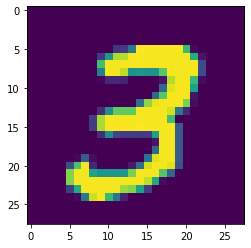

In [49]:
plt.imshow(input_image_resize)
plt.show()

In [50]:
input_image_resize=input_image_resize/255

In [51]:
type(input_image_resize)

numpy.ndarray

In [52]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [53]:
input_predction=model.predict(image_reshaped)
print(input_predction)

1/1 [==============================] - 0s 32ms/step
[[3.6365806e-12 1.5475254e-01 6.9571282e-03 1.0000000e+00 4.0962289e-11
  9.9566877e-01 1.5687099e-13 8.6199236e-04 9.8751605e-01 9.9640638e-01]]


In [54]:
input_predction_label=np.argmax(input_predction)

In [55]:
print(input_predction_label)

3
